<a href="https://colab.research.google.com/github/newtonferreira/challenge-amigo-secreto/blob/main/AluraStoreBr_NewtonFerreira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise: Faturamento total de cada loja


In [2]:
# calculando o faturamento total de cada loja
faturamento_loja1 = loja["Preço"].sum()
faturamento_loja2 = loja2["Preço"].sum()
faturamento_loja3 = loja3["Preço"].sum()
faturamento_loja4 = loja4["Preço"].sum()

# exibindo o resultado do calculo de faturamento por loja, formatado com duas casas decimais
print(f"Faturamento total da Loja 1: R$ {faturamento_loja1:.2f}")
print(f"Faturamento total da Loja 2: R$ {faturamento_loja2:.2f}")
print(f"Faturamento total da Loja 3: R$ {faturamento_loja3:.2f}")
print(f"Faturamento total da Loja 4: R$ {faturamento_loja4:.2f}")

Faturamento total da Loja 1: R$ 1534509.12
Faturamento total da Loja 2: R$ 1488459.06
Faturamento total da Loja 3: R$ 1464025.03
Faturamento total da Loja 4: R$ 1384497.58


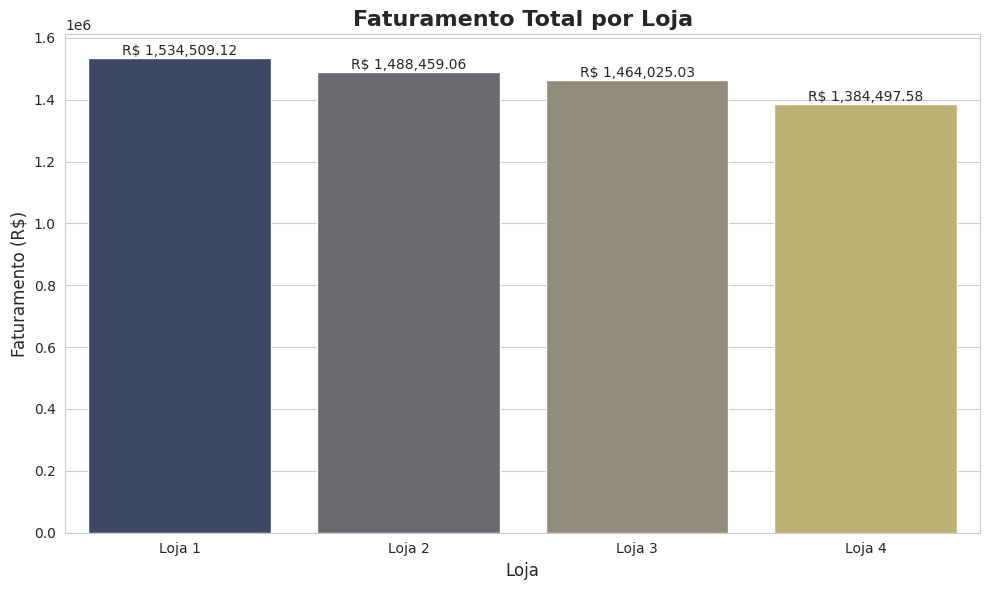

In [3]:
# importando as bibliotecas necessárias
import matplotlib.pyplot as plt
import seaborn as sns

# criando um dataframe para que o seaborn consiga gerar o gráfico
df_faturamento = pd.DataFrame({
    "Loja": ["Loja 1", "Loja 2", "Loja 3", "Loja 4"],
    "Faturamento": [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]
})

# definindo o estilo e o tamanho do gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# gerando o gráfico de barras e definindo a paleta de cores
sns.barplot(x="Loja", y="Faturamento", data=df_faturamento, hue="Loja", palette="cividis", dodge=False, legend=False)

# definindo o título e o nome dos eixos
plt.title("Faturamento Total por Loja", fontsize=16, fontweight='bold')
plt.xlabel("Loja", fontsize=12)
plt.ylabel("Faturamento (R$)", fontsize=12)

# adicionando os rótulos de valores
for index, row in df_faturamento.iterrows():
    plt.text(index, row["Faturamento"] + 500, f"R$ {row['Faturamento']:,.2f}",
             ha='center', va='bottom', fontsize=10)

#ajustando o layout e mostrando o gráfico
plt.tight_layout()
plt.show()

# 2. Análise: Vendas por categorias de produtos de cada loja


In [4]:
# agrupando e contando as categorias dos produtos vendidos por cada loja
categorias_loja1 = loja.groupby("Categoria do Produto")["Produto"].count().reset_index(name="Quantidade")
categorias_loja2 = loja2.groupby("Categoria do Produto")["Produto"].count().reset_index(name="Quantidade")
categorias_loja3 = loja3.groupby("Categoria do Produto")["Produto"].count().reset_index(name="Quantidade")
categorias_loja4 = loja4.groupby("Categoria do Produto")["Produto"].count().reset_index(name="Quantidade")

# exibindo as categorias mais populares de cada loja (do maior para o menor)
print("Categorias mais populares - Loja 1:")
print(categorias_loja1.sort_values(by="Quantidade", ascending=False), "\n")

print("Categorias mais populares - Loja 2:")
print(categorias_loja2.sort_values(by="Quantidade", ascending=False), "\n")

print("Categorias mais populares - Loja 3:")
print(categorias_loja3.sort_values(by="Quantidade", ascending=False), "\n")

print("Categorias mais populares - Loja 4:")
print(categorias_loja4.sort_values(by="Quantidade", ascending=False))

Categorias mais populares - Loja 1:
    Categoria do Produto  Quantidade
6                 moveis         465
2            eletronicos         448
0             brinquedos         324
1       eletrodomesticos         312
3        esporte e lazer         284
4  instrumentos musicais         182
5                 livros         173
7  utilidades domesticas         171 

Categorias mais populares - Loja 2:
    Categoria do Produto  Quantidade
6                 moveis         442
2            eletronicos         422
0             brinquedos         313
1       eletrodomesticos         305
3        esporte e lazer         275
4  instrumentos musicais         224
5                 livros         197
7  utilidades domesticas         181 

Categorias mais populares - Loja 3:
    Categoria do Produto  Quantidade
6                 moveis         499
2            eletronicos         451
0             brinquedos         315
1       eletrodomesticos         278
3        esporte e lazer         277


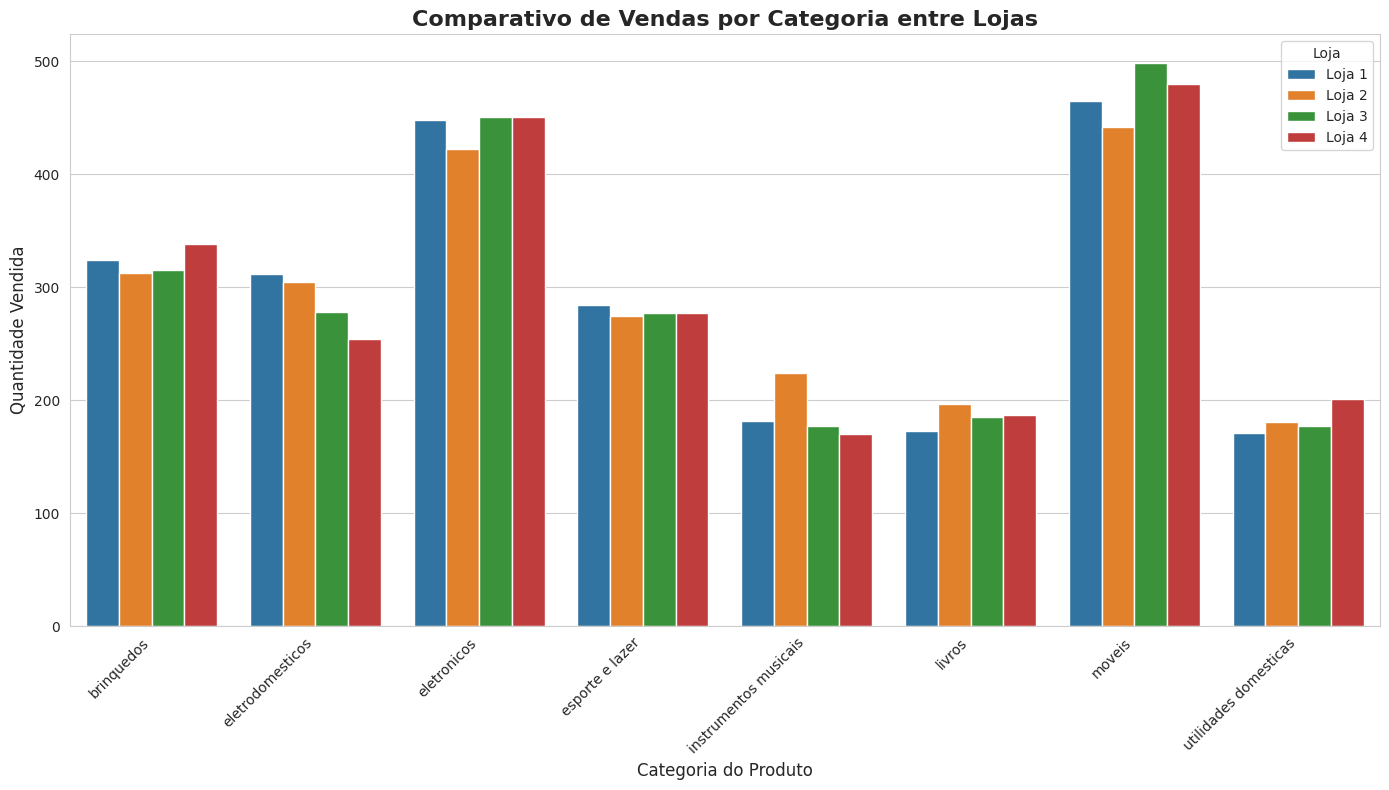

In [5]:
# importando as bibliotecas necessárias
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# criando a coluna que identifica cada loja
categorias_loja1["Loja"] = "Loja 1"
categorias_loja2["Loja"] = "Loja 2"
categorias_loja3["Loja"] = "Loja 3"
categorias_loja4["Loja"] = "Loja 4"

# concatenando os dataframes
todas_categorias = pd.concat([categorias_loja1, categorias_loja2, categorias_loja3, categorias_loja4])

# definindo o estilo e o tamanho do gráfico
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# gerando o gráfico de barras comparativo
sns.barplot(data=todas_categorias, x="Categoria do Produto", y="Quantidade", hue="Loja")

# ajustando o layout
plt.title("Comparativo de Vendas por Categoria entre Lojas", fontsize=16, fontweight="bold")
plt.xlabel("Categoria do Produto", fontsize=12)
plt.ylabel("Quantidade Vendida", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Loja")
plt.tight_layout()

# exibindo o gráfico
plt.show()

# 3. Análise: Média das avaliações dos clientes para cada loja


In [6]:
# calculando a média das avaliações de cada loja
media_avaliacoes = {
    "Loja 1": loja["Avaliação da compra"].mean(),
    "Loja 2": loja2["Avaliação da compra"].mean(),
    "Loja 3": loja3["Avaliação da compra"].mean(),
    "Loja 4": loja4["Avaliação da compra"].mean()
}

# transformando em dataframe para poder gerar a visualização
df_avaliacoes = pd.DataFrame(list(media_avaliacoes.items()), columns=["Loja", "Média de Avaliação"])
df_avaliacoes["Média de Avaliação"] = df_avaliacoes["Média de Avaliação"].round(2)

# exibindo as médias
print(df_avaliacoes)

     Loja  Média de Avaliação
0  Loja 1                3.98
1  Loja 2                4.04
2  Loja 3                4.05
3  Loja 4                4.00


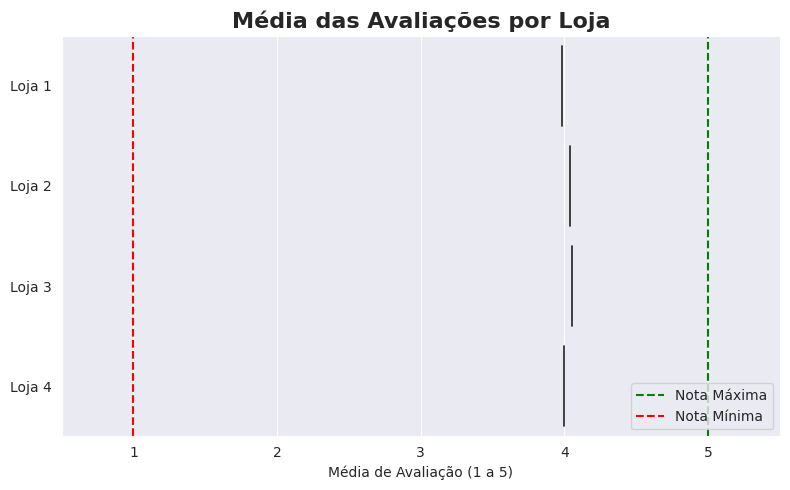

In [ ]:
# importanto as bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt

# definindo o estilo e tamanho do gráfico
plt.figure(figsize=(8, 5))
sns.set_style("darkgrid")

# gerando o gráfico de pontos e definindo as cores
sns.violinplot(data=df_avaliacoes, x="Média de Avaliação", y="Loja", size=10, color="darkblue")

# adicionando linhas de referência
plt.axvline(5, color='green', linestyle='--', label='Nota Máxima')
plt.axvline(1, color='red', linestyle='--', label='Nota Mínima')

# adicionando rótulos e títulos
plt.title("Média das Avaliações por Loja", fontsize=16, fontweight='bold')
plt.xlabel("Média de Avaliação (1 a 5)")
plt.ylabel("")

# ajustando o layout e exibindo o gráfico
plt.xlim(0.5, 5.5)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# 4. Análise: Produtos mais e menos vendidos por loja

In [7]:
# identificando o produto mais e o menos vendido por loja

produtos_loja1 = loja.groupby("Produto")["Quantidade de parcelas"].sum().reset_index(name="Quantidade Vendida")
produtos_loja1 = produtos_loja1.sort_values(by="Quantidade Vendida", ascending=False)

produtos_loja2 = loja2.groupby("Produto")["Quantidade de parcelas"].sum().reset_index(name="Quantidade Vendida")
produtos_loja2 = produtos_loja2.sort_values(by="Quantidade Vendida", ascending=False)

produtos_loja3 = loja3.groupby("Produto")["Quantidade de parcelas"].sum().reset_index(name="Quantidade Vendida")
produtos_loja3 = produtos_loja3.sort_values(by="Quantidade Vendida", ascending=False)

produtos_loja4 = loja4.groupby("Produto")["Quantidade de parcelas"].sum().reset_index(name="Quantidade Vendida")
produtos_loja4 = produtos_loja4.sort_values(by="Quantidade Vendida", ascending=False)

# exibindo os cinco produtos mais vendidos e os cinco menos vendidos por loja
print("Loja 1 - Produtos mais e menos vendidos:")
print("Mais vendidos:")
print(produtos_loja1.head(5))
print("Menos vendidos:")
print(produtos_loja1.tail(5), "\n")

print("Loja 2 - Produtos mais e menos vendidos:")
print("Mais vendidos:")
print(produtos_loja2.head(5))
print("Menos vendidos:")
print(produtos_loja2.tail(5), "\n")

print("Loja 3 - Produtos mais e menos vendidos:")
print("Mais vendidos:")
print(produtos_loja3.head(5))
print("Menos vendidos:")
print(produtos_loja3.tail(5), "\n")

print("Loja 4 - Produtos mais e menos vendidos:")
print("Mais vendidos:")
print(produtos_loja4.head(5))
print("Menos vendidos:")
print(produtos_loja4.tail(5))

Loja 1 - Produtos mais e menos vendidos:
Mais vendidos:
               Produto  Quantidade Vendida
43  Secadora de roupas                 214
47       TV Led UHD 4K                 196
17              Cômoda                 188
27          Impressora                 182
2            Bicicleta                 178
Menos vendidos:
           Produto  Quantidade Vendida
15  Corda de pular                 100
48     Tablet ABXY                  99
19  Dinossauro Rex                  94
38         Mochila                  90
11    Celular ABXY                  78 

Loja 2 - Produtos mais e menos vendidos:
Mais vendidos:
                     Produto  Quantidade Vendida
28  Iniciando em programação                 223
12          Celular Plus X42                 195
49                    Violão                 183
37               Micro-ondas                 179
43        Secadora de roupas                 177
Menos vendidos:
              Produto  Quantidade Vendida
42           Poltrona     

# 5. Análise: Custo médio do frete por loja


In [8]:
# calculando a média do valor de frete de cada loja
media_frete = {
    "Loja 1": loja["Frete"].mean(),
    "Loja 2": loja2["Frete"].mean(),
    "Loja 3": loja3["Frete"].mean(),
    "Loja 4": loja4["Frete"].mean()
}

# gerando dataframe para conseguir fazer a visualização
df_frete = pd.DataFrame(list(media_frete.items()), columns=["Loja", "Custo Médio de Frete"])
df_frete["Custo Médio de Frete"] = df_frete["Custo Médio de Frete"].round(2)

# exibindo o resultado da média
print(df_frete)

     Loja  Custo Médio de Frete
0  Loja 1                 34.69
1  Loja 2                 33.62
2  Loja 3                 33.07
3  Loja 4                 31.28


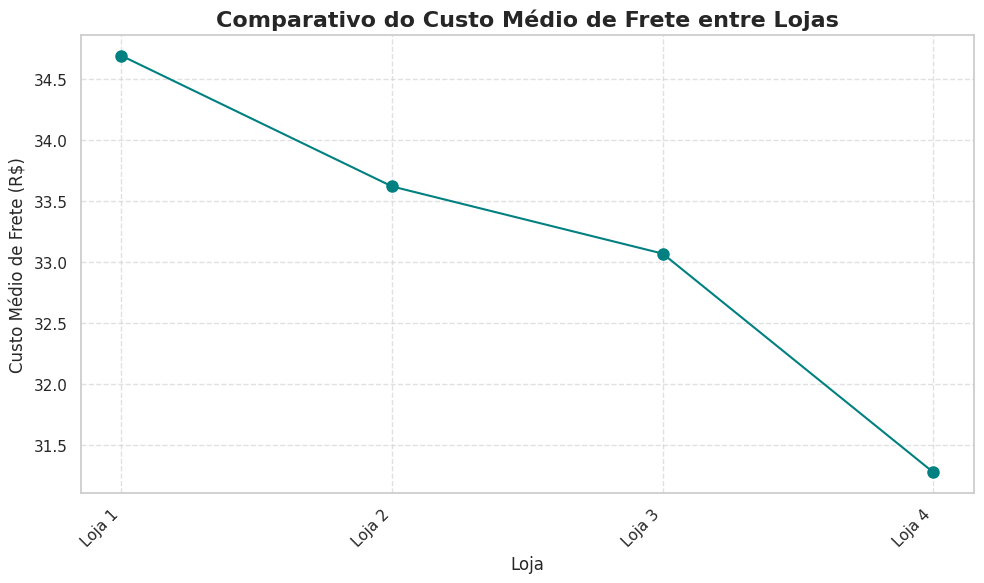

In [ ]:
# importando a biblioteca necessária
import matplotlib.pyplot as plt

# definindo o tamanho do gráfico
plt.figure(figsize=(10, 6))

# gerando o gráfico de linhas
plt.plot(df_frete["Loja"], df_frete["Custo Médio de Frete"], marker="o", linestyle='-', color="teal", markersize=8)

# adicionando o título e os rótulos
plt.title("Comparativo do Custo Médio de Frete entre Lojas", fontsize=16, fontweight="bold")
plt.xlabel("Loja", fontsize=12)
plt.ylabel("Custo Médio de Frete (R$)", fontsize=12)

# ajustando o layout
plt.xticks(rotation=45, ha="right")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

# exibindo o gráfico
plt.show()

# 6. Relatório final


Neste relatório, apresento ao cliente minha análise e conclusão sobre qual das quatro lojas deve ser vendida, com base nas seguintes métricas avaliadas:
- Faturamento total de cada loja;
- Vendas por categorias de produtos de cada loja;
- Média das avaliações dos clientes para cada loja;
- Produtos mais e menos vendidos por loja;
- Custo médio do frete por loja.

1. **Faturamento total de cada loja:**
A Loja 4 apresentou o menor faturamento entre todas, indicando baixa geração de receita e menor movimentação de vendas.

2. **Vendas por categorias de produtos de cada loja:**
Apesar de todas as lojas apresentarem cenários semelhantes, a Loja 3 demonstrou maior discrepância entre as categorias mais vendidas e o menos vendidas, o que pode ser indício de que a loja tem pouco potencial para vender com maior  diversidade, o que pode ser revertido com ações comerciais/promocionais.

3. **Média das avaliações dos clientes para cada loja:**
A Loja 1 teve o pior desempenho em avaliações, apesar da diferença pouco significativa em relação às demais, o que pode ser revertido com a implementação de ações de treinamento.

4. **Produtos mais e menos vendidos por loja:**
Embora tenha alguns produtos com vendas regulares, a Loja 3 possui muitos produtos com baixa saída, sendo a loja que tem o menor topo de vendas entre os produtos mais vendidos e menor variação de vendas entre o mais e menos vendido, o que pode ser revertido com ações comerciais estratégicas.

5. **Custo médio do frete por loja:**
A Loja 1 possui o custo médio de frete mais alto entre as lojas, o que pode ser um fator desencorajante para os consumidores. Um reestudo, baseado no benchmark com outras lojas do próprio grupo, pode ser uma ação eficaz para melhorar isso.

Considero, baseado na análise proposta nesse contexto, que o faturamento é o fator com maior peso na tomada de decisão, visto que os demais fatores podem ser melhorados com algumas ações bastante factíveis acima mencionadas.

Baseado nessas ponderações, concluo:
- **RECOMENDAÇÃO: VENDER A LOJA 4**

Conforme evidenciado na análise realizada, a loja 4 apresenta menor faturamento em comparação com as demais, e isso tem um impacto mais significativo do que outras limitações percebidas nas demais lojas. Pequenas vantagens, tais como o "custo médio do frete", podem ser compensadas com melhorias operacionais nas outras lojas. Independentemente da decisão final do cliente, é bastante recomendado que as lojas remanescentes sejam trabalhadas no seu melhoramento contínuo (kaizen).

